# INERZIA ELICOTTERO

## RACCOLTA DATI

In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from interpolazione2 import RettaInterpolata

import os

dir_path = os.path.abspath('')
FILE = dir_path + '/../CSV/' + 'elicottero.csv'
fr = pd.read_csv(FILE)

alfa1 = np.mean(fr['alfa1 (1-5)'])
sigma_alfa1 = np.std(fr['alfa1 (1-5)'])

alfa2 = np.mean(fr["alfa2 (6-10)"])
sigma_alfa2 = np.std(fr["alfa2 (6-10)"])

alfa3 = np.mean(fr["alfa3"])
sigma_alfa3 = np.std(fr['alfa3'])

m = np.array([50,70,85]) * 0.001
alfa = np.array([alfa1,alfa2,alfa3]) # gr/s^2
raggio = 0.01 # m
alfa = (alfa/180) * np.pi # rad/s^2
sigma_alfa = np.array([sigma_alfa1,sigma_alfa2,sigma_alfa3])
sigma_alfa = (sigma_alfa/180)*np.pi #rad/s^2

m_asta = 0.026 #Kg massa asta
m_pesi = 0.08 #Kg massa singolo peso
l = 0.38 # m lunghezza asta
D = (l-0.02)/2 # m distanza del centro di massa dei pesi dall'asse di rotazione

## ANALISI DATI

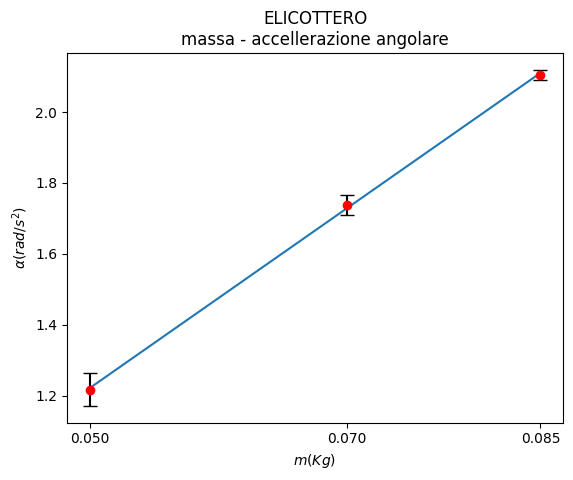


linearità: 
B: 25.41105048782016
sigmaB: [1.86748532 1.14974717 0.62488464]
A: -0.04961923892359025
sigmaA: [0.13039007 0.08027673 0.0436302 ]
sigmaY: [0.04637484 0.02855141 0.01551762]

chiquadro osservato: 0.24297188295560196
chiquadro ridotto: 0.24297188295560196
gradi di libertà: 1
vincoli: 2
        


In [15]:
r = RettaInterpolata(m, alfa, sigma_alfa)
plt.errorbar(m,alfa,yerr=sigma_alfa,fmt='o',color='red',ecolor='black',capsize=5)
plt.plot(r.best_x,r.best_y)
plt.xticks(m)
plt.title("ELICOTTERO\nmassa - accellerazione angolare")
plt.ylabel("$\\alpha (rad/s^2)$")
plt.xlabel("$m (Kg)$")
plt.show()

print(r)

### inerzia attesa

$I = I_{asta} + 2I_{pesi} = \frac{1}{12}m_{asta}l^2_{asta} + 2m_{pesi}D^2$

In [16]:
I_asta = (1/12)*m_asta * (l**2)
I_pesi = 2 * m_pesi * (D**2)
I = I_asta + I_pesi
print("Inerzia attesa elicottero: ",np.round(I,6))

Inerzia attesa elicottero:  0.005497


### inerzia misurata:

$I\alpha = mgr \Rightarrow I = \frac{mgr}{\alpha}$

$\alpha \propto m \Rightarrow \alpha = \frac{gr}{I} m$

$B = \frac{gr}{I} \Rightarrow I =  \frac{gr}{B}$

In [17]:
I = 9.8 * raggio / r.B
sigmaI = I * (np.mean(r.sigmaB)/r.B) # i sigmaB sono 3

print('Inerzia misurata elicottero: ',np.round(I,6),np.round(sigmaI,6))

Inerzia misurata elicottero:  0.003857 0.000184
